<a href="https://colab.research.google.com/github/Maoelan/Depression-Classification/blob/main/Sertifikasi_AI_Game_Maulana_Muhammad_Depression_Classification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Datasets : https://www.kaggle.com/datasets/diegobabativa/depression

In [274]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

In [275]:
depression = pd.read_csv("/content/drive/MyDrive/dataset/b_depressed.csv")
depression.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


**PREPROCESSING DATA**

In [276]:
#Check missing value
print(depression.isnull().sum())

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64


In [277]:
#Drop missing value
depression = depression.dropna()

In [278]:
#Check missing value
print(depression.isnull().sum())

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64


In [279]:
depression['sex'].value_counts()

1    1294
0     115
Name: sex, dtype: int64

In [280]:
#Drop Feature
depression.drop(columns=["Survey_id","Ville_id"], inplace=True)
depression

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,1,28,1,4,10,6,15711078,24023054,15506558,10476722,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,1,66,0,0,1,1,42440731,22861940,22562605,12545372,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,1,51,1,1,12,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [281]:
#Check Data Info
depression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1409 non-null   int64  
 1   Age                    1409 non-null   int64  
 2   Married                1409 non-null   int64  
 3   Number_children        1409 non-null   int64  
 4   education_level        1409 non-null   int64  
 5   total_members          1409 non-null   int64  
 6   gained_asset           1409 non-null   int64  
 7   durable_asset          1409 non-null   int64  
 8   save_asset             1409 non-null   int64  
 9   living_expenses        1409 non-null   int64  
 10  other_expenses         1409 non-null   int64  
 11  incoming_salary        1409 non-null   int64  
 12  incoming_own_farm      1409 non-null   int64  
 13  incoming_business      1409 non-null   int64  
 14  incoming_no_business   1409 non-null   int64  
 15  inco

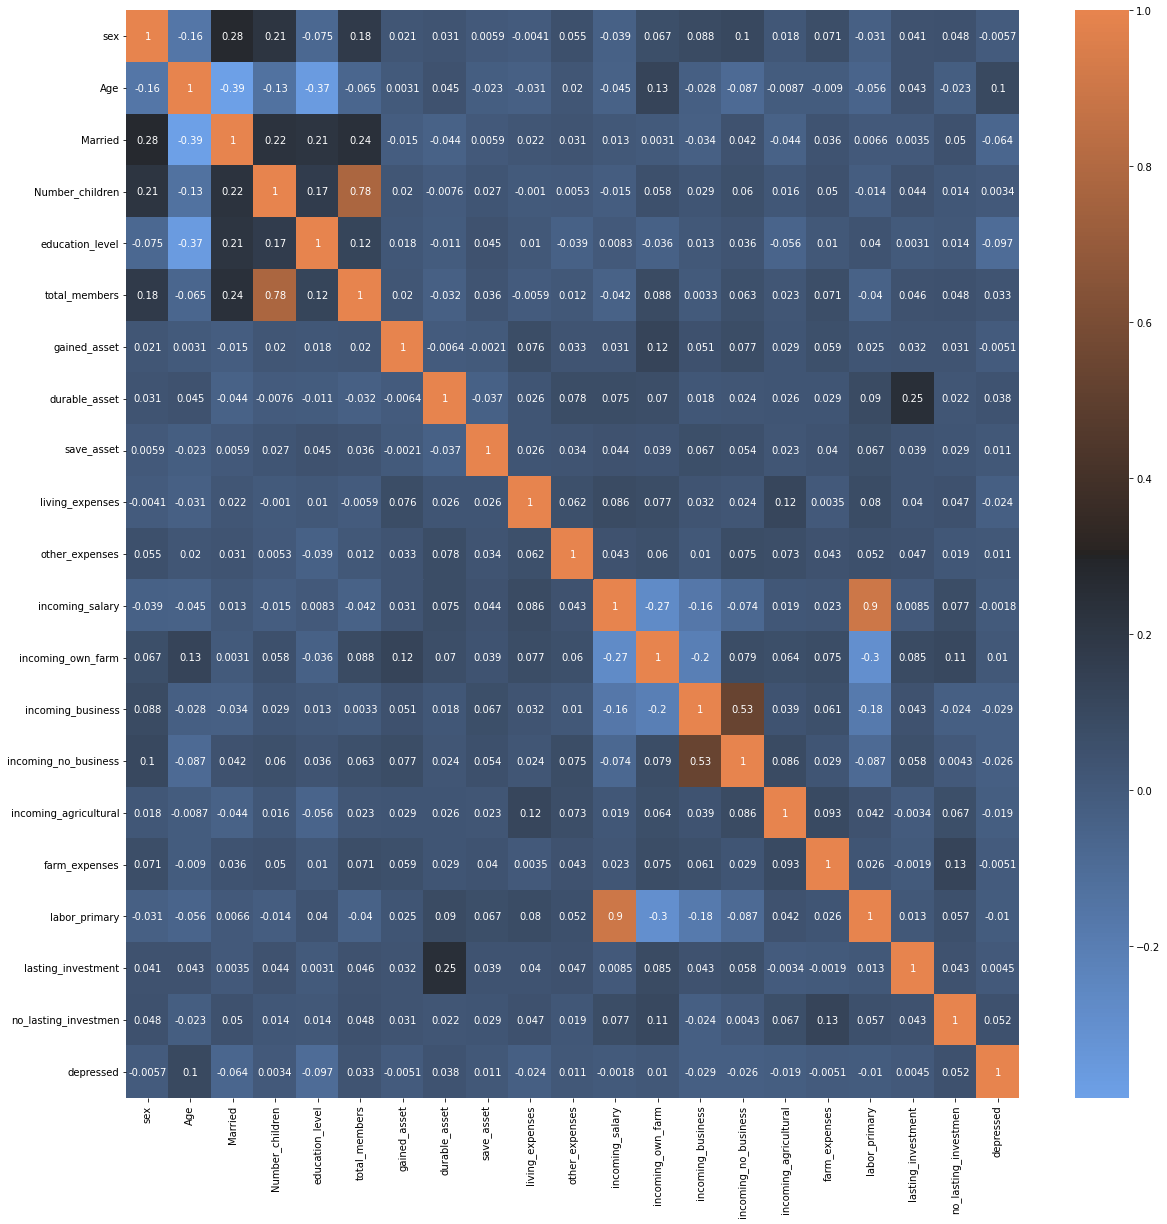

In [282]:
#Correlation Check
corr = depression.corr()
plt.subplots(figsize=(20,20))

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

In [283]:
#x For Feature
x = depression.iloc[:,:20]
x

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1425,1,28,1,4,10,6,15711078,24023054,15506558,10476722,71588707,0,1,0,0,23022095,1021536,0,1823477,47384361.0
1426,1,66,0,0,1,1,42440731,22861940,22562605,12545372,56534257,0,1,0,0,12545373,10454478,0,46444572,10454478.0
1427,1,51,1,1,12,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0


In [284]:
#y For Class
y = depression.iloc[:,20]
y

0       0
1       1
2       0
3       0
4       0
       ..
1424    0
1425    0
1426    1
1427    0
1428    0
Name: depressed, Length: 1409, dtype: int64

**FEATURE SELECTION**

In [285]:
#Feature Extraction

bestfeatures = SelectKBest(score_func = chi2, k = 9)
fit = bestfeatures.fit(x,y)
depressionscores = pd.DataFrame(fit.scores_)
depressioncolumns = pd.DataFrame(x.columns)

featurescore = pd.concat([depressioncolumns, depressionscores], axis = 1)
featurescore.columns = ["Attr","Score"]
print(featurescore.nlargest(9,"Score"))

                     Attr         Score
19   no_lasting_investmen  5.281624e+07
7           durable_asset  2.486713e+07
9         living_expenses  1.116024e+07
15  incoming_agricultural  6.717510e+06
10         other_expenses  2.409390e+06
8              save_asset  2.102179e+06
16          farm_expenses  4.583947e+05
6            gained_asset  4.411600e+05
18     lasting_investment  3.794712e+05


**not used feature**

sex,
Age,
Married,
Number_children,
education_level,
total_members,
incoming_salary,
incoming_own_farm,
incoming_business,
incoming_no_business,
laborn_primary,

In [286]:
#Drop Feature
depression.drop(columns=["save_asset","farm_expenses","gained_asset","lasting_investment","sex","Age","Married","Number_children","education_level","total_members","incoming_salary","incoming_own_farm","incoming_business","incoming_no_business","labor_primary"], inplace=True)
depression

,durable_asset,living_expenses,other_expenses,incoming_agricultural,no_lasting_investmen,depressed
0,22861940,26692283,28203066,30028818,28292707.0,0
1,22861940,26692283,28203066,30028818,28292707.0,1
2,22861940,26692283,28203066,30028818,28292707.0,0
3,19698904,397715,44042267,22288055,69219765.0,0
4,17352654,80877619,74503502,53384566,43419447.0,0
...,...,...,...,...,...,...
1424,22861940,26692283,28203066,30028818,28292707.0,0
1425,24023054,10476722,71588707,23022095,47384361.0,0
1426,22861940,12545372,56534257,12545373,10454478.0,1
1427,22861940,26692283,28203066,30028818,28292707.0,0


**Splitting Data**

In [287]:
#Splitting data using train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

**Modelling & Data Evaluation**

**Decision Tree**

In [304]:
#Training Decision Tree Model
dt = DecisionTreeClassifier(criterion = "gini")
dt = dt.fit(x_train, y_train)

In [305]:
#Testing Decision Tree Model
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [306]:
#Model Evaluation Decision Tree
print("Confusion matrix : \n", confusion_matrix(y_pred, y_test))
print("Classification report matrix : \n", classification_report(y_pred, y_test))

Confusion matrix : 
 [[200  28]
 [ 41  13]]
Classification report matrix : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       228
           1       0.32      0.24      0.27        54

    accuracy                           0.76       282
   macro avg       0.57      0.56      0.56       282
weighted avg       0.73      0.76      0.74       282



In [307]:
#Accuracy Check Model Decision Tree
print(accuracy_score(y_pred, y_test))

0.7553191489361702


**Naive Bayes**

In [292]:
#Training Naive Bayes Model
nb = GaussianNB()
nb = nb.fit(x_train, y_train)

In [293]:
#Testing Naive Bayes Model
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [294]:
#Model Evaluation Naive Bayes
print("Confusion matrix : \n", confusion_matrix(y_pred, y_test))
print("Classification report matrix : \n", classification_report(y_pred, y_test))

Confusion matrix : 
 [[239  39]
 [  2   2]]
Classification report matrix : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       278
           1       0.05      0.50      0.09         4

    accuracy                           0.85       282
   macro avg       0.52      0.68      0.50       282
weighted avg       0.98      0.85      0.91       282



In [295]:
#Accuracy Check Model Naive Bayes
print(accuracy_score(y_pred, y_test))

0.8546099290780141


**K-Nearest Neighbor**

In [296]:
#Training KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [297]:
#Testing KNN Model
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [298]:
#Model Evaluation KNN
print("Confusion matrix : \n", confusion_matrix(y_pred, y_test))
print("Classification report matrix : \n", classification_report(y_pred, y_test))

Confusion matrix : 
 [[237  38]
 [  4   3]]
Classification report matrix : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       275
           1       0.07      0.43      0.12         7

    accuracy                           0.85       282
   macro avg       0.53      0.65      0.52       282
weighted avg       0.96      0.85      0.90       282



In [299]:
#Accuracy Check Model KNN
print(accuracy_score(y_pred, y_test))

0.851063829787234
